In [1]:
from tensorflow.keras.datasets import imdb
max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [2]:
from tensorflow.keras.preprocessing import sequence
max_len = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [3]:
x_train.shape

(25000, 500)

In [4]:
y_test.shape

(25000,)

In [5]:
y_train.shape

(25000,)

In [6]:
y_test[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [7]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [8]:
y_test_one_hot.shape

(25000, 2)

In [9]:
y_test_one_hot[0]

array([1., 0.], dtype=float32)

In [10]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [11]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.LSTM(32))
# # of parameters = 8320 = (32*32+32*32+32)*4
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 328,386
Trainable params: 328,386
Non-trainable params: 0
_________________________________________________________________


In [12]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
checkpoint_filepath = './temp/checkpoint_lstm_en'
mc = ModelCheckpoint(checkpoint_filepath, monitor='val_loss', mode='min', 
                     save_weights_only=True, save_best_only=True)

In [13]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics='accuracy')

In [14]:
history=model.fit(x_train, y_train_one_hot, epochs=20, batch_size=128, validation_split=0.1, callbacks=[es, mc])

Epoch 1/20
176/176 [==============================] - 25s 134ms/step - loss: 0.4989 - accuracy: 0.7692 - val_loss: 0.4298 - val_accuracy: 0.8252
Epoch 2/20
176/176 [==============================] - 23s 131ms/step - loss: 0.2893 - accuracy: 0.8883 - val_loss: 0.2853 - val_accuracy: 0.8824
Epoch 3/20
176/176 [==============================] - 23s 133ms/step - loss: 0.2341 - accuracy: 0.9129 - val_loss: 0.2844 - val_accuracy: 0.8892
Epoch 4/20
176/176 [==============================] - 23s 133ms/step - loss: 0.1999 - accuracy: 0.9259 - val_loss: 0.2820 - val_accuracy: 0.8888
Epoch 5/20
176/176 [==============================] - 24s 134ms/step - loss: 0.1786 - accuracy: 0.9353 - val_loss: 0.3125 - val_accuracy: 0.8904
Epoch 6/20
176/176 [==============================] - 23s 133ms/step - loss: 0.1613 - accuracy: 0.9419 - val_loss: 0.3539 - val_accuracy: 0.8624
Epoch 7/20
176/176 [==============================] - 23s 133ms/step - loss: 0.1518 - accuracy: 0.9446 - val_loss: 0.3709 - val_ac

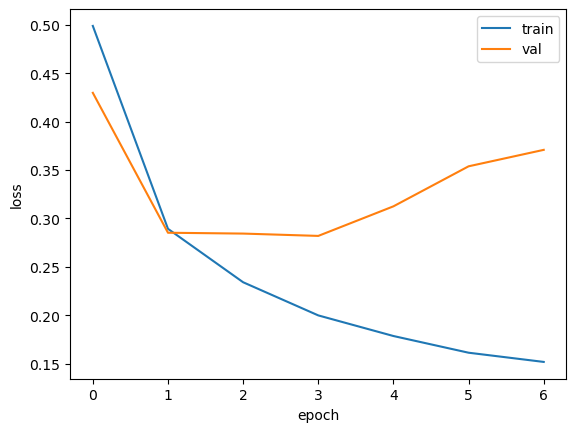

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [16]:
model.load_weights(checkpoint_filepath)

In [17]:
test_loss, test_acc = model.evaluate(x_test,y_test_one_hot)

782/782 [==============================] - 20s 26ms/step - loss: 0.2942 - accuracy: 0.8816


In [18]:
print('test_acc:', test_acc)

test_acc: 0.881600022315979
